Loaded data type: <class 'dict'>
Keys: dict_keys(['embeddings', 'labels', 'indexes'])
Embeddings shape: (460, 20, 2, 64)
Labels shape: (460,)


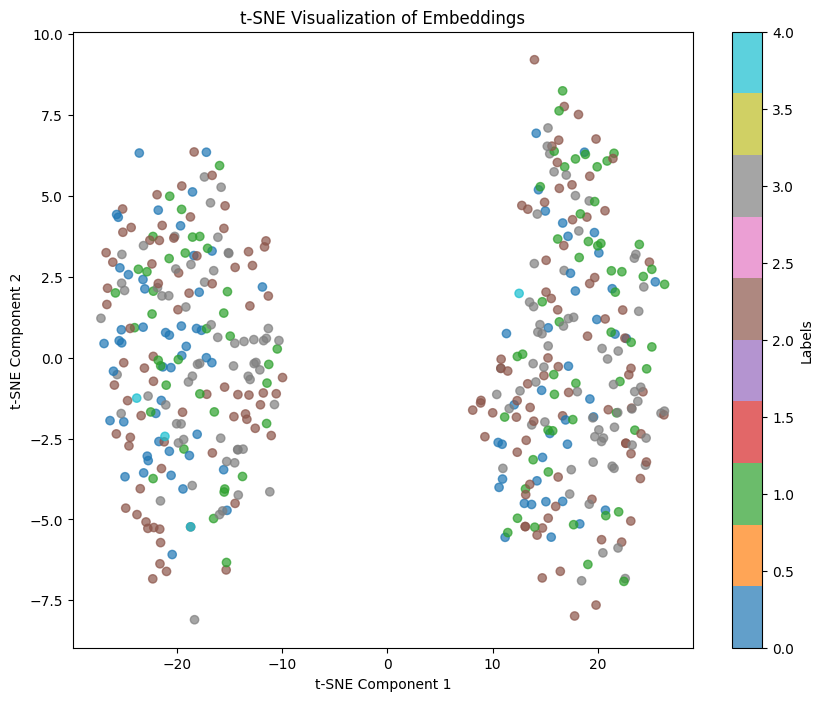

In [30]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from scripts.load_encoded_data import load_stored_data

def plot_tsne(embeddings, labels):
    """
    Plot embeddings using t-SNE.

    Parameters:
    - embeddings (np.ndarray): Array of stored embeddings.
    - labels (np.ndarray): Array of corresponding labels.
    """
    # Flatten 3D embeddings to 2D
    flattened_embeddings = embeddings.reshape(embeddings.shape[0], -1)

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=32, perplexity=50)
    reduced_embeddings = tsne.fit_transform(flattened_embeddings)

    # Plot the t-SNE results
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap="tab10", alpha=0.7
    )
    plt.colorbar(scatter, label="Labels")
    plt.title("t-SNE Visualization of Embeddings")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()


# Path to the saved data file
file_path = "/home/atefeh/AG-MAE/experiments/shrec21/asl_right_1/stmae_embeddings_pd_2.npy"  # Update with the correct path

# Load the data
embeddings, labels, indexes = load_stored_data(file_path)

# select the embedings of the last layer and just for the joint 0,8,4
embeddings = embeddings[:,100:120,[8,4],:]
# Check dimensions
print(f"Embeddings shape: {embeddings.shape}")
print(f"Labels shape: {labels.shape}")

# Plot t-SNE
plot_tsne(embeddings, labels)
